# Analysis - exp11

A wythoff stumbler-strategist hyper-parameter search. Influence rate.

In [1]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Find the files
path = "/Users/type/Code/azad/data/wythoff/exp11/"
results_path = "/Users/type/Code/azad/data/wythoff/"

files = sorted(glob(os.path.join(path, "run_*")))
files[:10]

['/Users/type/Code/azad/data/wythoff/exp11/run_0.pytorch',
 '/Users/type/Code/azad/data/wythoff/exp11/run_1.pytorch',
 '/Users/type/Code/azad/data/wythoff/exp11/run_10.pytorch',
 '/Users/type/Code/azad/data/wythoff/exp11/run_11.pytorch',
 '/Users/type/Code/azad/data/wythoff/exp11/run_12.pytorch',
 '/Users/type/Code/azad/data/wythoff/exp11/run_13.pytorch',
 '/Users/type/Code/azad/data/wythoff/exp11/run_14.pytorch',
 '/Users/type/Code/azad/data/wythoff/exp11/run_15.pytorch',
 '/Users/type/Code/azad/data/wythoff/exp11/run_16.pytorch',
 '/Users/type/Code/azad/data/wythoff/exp11/run_17.pytorch']

In [3]:
model = th.load(files[0])

In [4]:
model.keys()

dict_keys(['episode', 'epsilon', 'anneal', 'gamma', 'num_episodes', 'num_stumbles', 'num_strategies', 'influence', 'stumbler_score', 'strategist_score', 'stumbler_game', 'strategist_game', 'cold_threshold', 'hot_threshold', 'learning_rate_stumbler', 'learning_rate_strategist', 'learning_rate_influence', 'strategist_state_dict', 'stumbler_player_dict', 'stumbler_opponent_dict'])

In [5]:
table = []
for fi in files:
    # Extract row_code
    row_code = int(os.path.split(fi)[-1].split('_')[-1].split('.')[0])
    
    # load data
    model = th.load(fi)
    row = (
        row_code, 
        model['learning_rate_influence'],
        model['stumbler_score'],
        model['strategist_score'],
        model['influence']
    )
    table.append(row)
    
pprint(table[:3])

[(0, 0.01, 0.7073010337100462, 0.011347174644470215, 0.7900000000000005),
 (1, 0.062105, 0.8836515010022391, 0.01641702651977539, 1.0),
 (10, 0.531053, 0.778611504135892, 0.0024625062942504883, 1.0)]


In [12]:
# Sort by score
def get_score(row):
    return row[2]

table = sorted(table, key=get_score, reverse=True)
pprint(table[:20])

[(1, 0.062105, 0.8836515010022391, 0.01641702651977539, 1.0),
 (19, 1.0, 0.8807677891783309, 0.00012737512588500977, 0.0),
 (9, 0.478947, 0.8721385067931943, 0.028239965438842773, 1.0),
 (12, 0.635263, 0.86587674755112, 0.0004697442054748535, 1.0),
 (16, 0.843684, 0.851962286451355, 0.00020170211791992188, 0.156316),
 (3, 0.166316, 0.8507089238471933, 2.5153160095214844e-05, 0.833684),
 (6, 0.322632, 0.8498931052975496, 0.002342700958251953, 1.0),
 (4, 0.218421, 0.8422748175219115, 0.00018525123596191406, 1.0),
 (11, 0.583158, 0.8318838753075734, 0.008540868759155273, 0.41684200000000005),
 (13, 0.687368, 0.828213909260927, 0.0015445947647094727, 1.0),
 (8, 0.426842, 0.8256993691351097, 0.0012285113334655762, 1.0),
 (5, 0.270526, 0.8155468111463187, 0.00016307830810546875, 1.0),
 (10, 0.531053, 0.778611504135892, 0.0024625062942504883, 1.0),
 (2, 0.114211, 0.7722474844966473, 0.08305537700653076, 1.0),
 (17, 0.895789, 0.7478370663320324, 0.03978586196899414, 1.0),
 (15, 0.791579, 0.717

In [18]:
# Save the sorted results table
f_name = os.path.join(results_path, "exp11_ranked.csv")
head = (
    'learning_rate',
    "row_code", 
    'stumbler_score',
    'strategist_score',
    'influence'
)

with open(f_name, "w") as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(head)
    
    for row in table:
        writer.writerow(row)

# Plots

## Score distributions

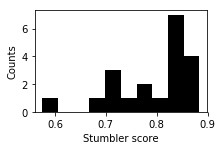

In [23]:
stumbler_score = [row[2] for row in table]

plt.figure(figsize=(3, 2))
_ = plt.hist(stumbler_score, color='black', bins=10)
_ = plt.tight_layout()
_ = plt.ylabel("Counts")
_ = plt.xlabel("Stumbler score")

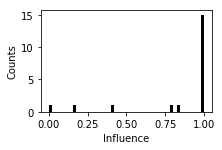

In [43]:
influence = [row[4] for row in table]
strategist_score = [row[3] for row in table]

plt.figure(figsize=(3, 2))
_ = plt.hist(scores, color='black', bins=45)
_ = plt.tight_layout()
_ = plt.ylabel("Counts")
_ = plt.xlabel("Influence")

## Strategist as a function of other parameters

In [24]:
learning_rate = [row[1] for row in table]

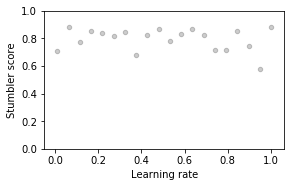

In [39]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(learning_rate, stumbler_score, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.xlabel("Learning rate")
_ = plt.ylabel("Stumbler score")
_ = plt.ylim(0, 1)

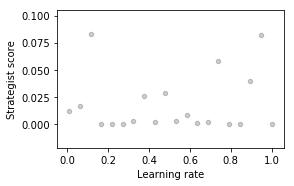

In [48]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(learning_rate, strategist_score, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.xlabel("Learning rate")
_ = plt.ylabel("Strategist score")

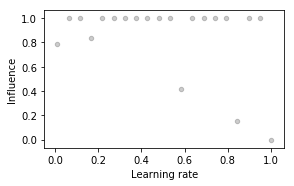

In [49]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(learning_rate, influence, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.xlabel("Learning rate")
_ = plt.ylabel("Influence")

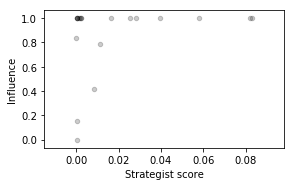

In [46]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(strategist_score, influence, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.xlabel("Strategist score")
_ = plt.ylabel("Influence")

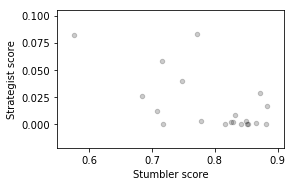

In [51]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(stumbler_score, strategist_score, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.ylabel("Strategist score")
_ = plt.xlabel("Stumbler score")